In [1]:
import sys
import pandas as pd

In [3]:
book = pd.read_csv('book_info.csv')
book['book_QN'] = book['work'].str.split('/').str[-1]
book_clean = book.drop_duplicates(subset=['book_QN'])
book_clean = book_clean[book_clean['book_QN'] != 'Q43361']
# match = pd.read_csv('updated_fm.csv')
# match = match[['id','book_QN']]
# book_clean = pd.merge(book_clean, match, on = 'book_QN', how = 'left')
# book_1800_1950 = book_clean[(book_clean['PublicationYear'] <= 1950) & (book_clean['PublicationYear'] >=1800)]
display(book)

,Unnamed: 0,work,genre,workLabel,genreLabel,PublicationYear,book_QN
0,0,http://www.wikidata.org/entity/Q43361,http://www.wikidata.org/entity/Q132311,Harry Potter and the Philosopher's Stone,fantasy,1997,Q43361
1,1,http://www.wikidata.org/entity/Q43361,http://www.wikidata.org/entity/Q21802675,Harry Potter and the Philosopher's Stone,adventure fiction,1997,Q43361
2,2,http://www.wikidata.org/entity/Q43361,http://www.wikidata.org/entity/Q111984153,Harry Potter and the Philosopher's Stone,young adult fiction,1997,Q43361
3,0,http://www.wikidata.org/entity/Q740473,http://www.wikidata.org/entity/Q132311,The House on the Borderland,fantasy,1908,Q740473
4,1,http://www.wikidata.org/entity/Q740473,http://www.wikidata.org/entity/Q16575965,The House on the Borderland,horror fiction,1908,Q740473
...,...,...,...,...,...,...,...
3201,0,http://www.wikidata.org/entity/Q1434818,http://www.wikidata.org/entity/Q80930,Ghosts,tragedy,1881,Q1434818
3202,0,http://www.wikidata.org/entity/Q588161,http://www.wikidata.org/entity/Q1123381,The Imaginary Invalid,comédie-ballet,1673,Q588161
3203,0,http://www.wikidata.org/entity/Q1768515,http://www.wikidata.org/entity/Q1164267,The Voyage of the Beagle,travel book,1839,Q1768515
3204,1,http://www.wikidata.org/entity/Q1768515,http://www.wikidata.org/entity/Q3337126,The Voyage of the Beagle,nature writing,1839,Q1768515


In [3]:
word_count = {}
fnf = pd.read_csv('files_not_found.csv')
book_filtered = book_1800_1950[~book_1800_1950['id'].isin(fnf['id'])]

for index, row in book_filtered.iterrows():
    idnum = row['id']
    column_names = ['word', 'count']  # Add column names as needed    
    filename = "counts/csv/" + idnum + "_counts.csv"
    file = pd.read_csv(filename, names=column_names)
    year = (row['PublicationYear'] // 10)*10
    selected = file[file['word'] == 'revolver']['count']
    if selected.empty:
        count = 0
    else:
        count = int(selected)
    if year in word_count:
        word_count[year] += count
    else:
        word_count[year] = count
df = pd.DataFrame(word_count.items(), columns=["year", "count"])
display(df)

,word,count
0,1900,587
1,1820,1
2,1880,96
3,1910,497
4,1890,232
5,1920,274
6,1830,0
7,1870,99
8,1840,0
9,1810,0


Text(0.5, 1.0, 'Histogram')

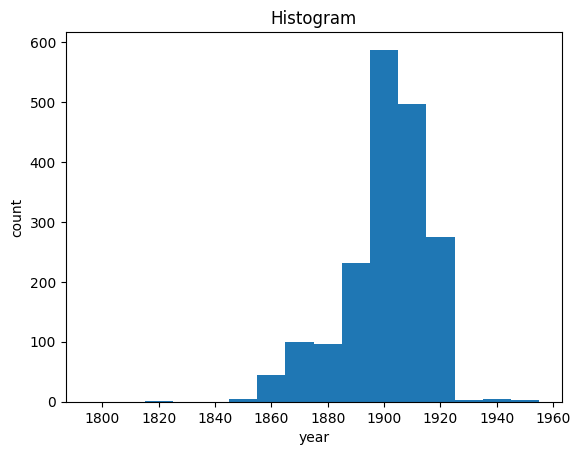

In [7]:
import matplotlib.pyplot as plt
plt.bar(df['word'], df['count'],width=10)

# Adding labels and title
plt.xlabel('year')
plt.ylabel('count')
plt.title('Histogram')